In [53]:
import numpy as np
import pandas as pd

In [54]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

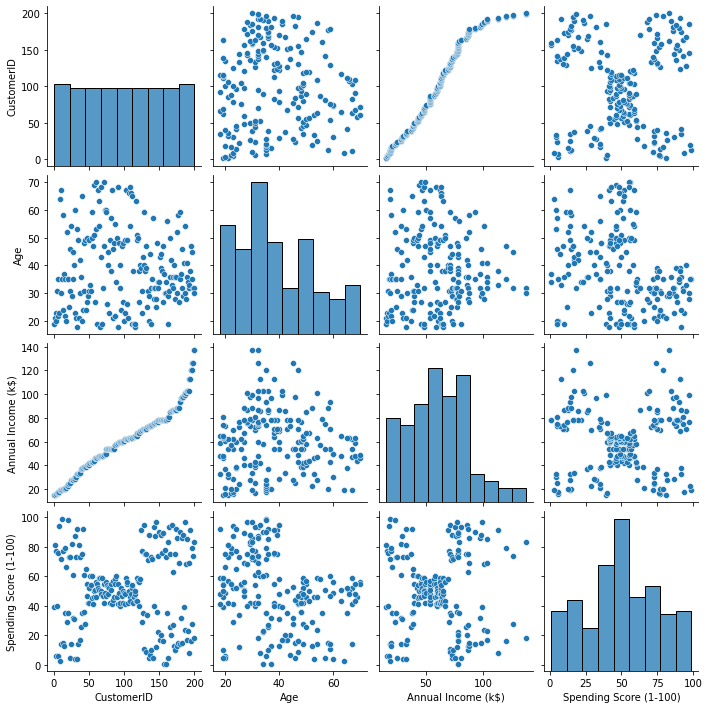

In [56]:
sns.pairplot(df)

#### Customer ID and Spending score(1-100)

In [57]:
X=df.iloc[:,[0]]
X.head()

,CustomerID
0,1
1,2
2,3
3,4
4,5


In [58]:
y=df.iloc[:,[4]]
y.head()

,Spending Score (1-100)
0,39
1,81
2,6
3,77
4,40


In [59]:
customer_spending=pd.concat([X,y],axis=1)

In [60]:
customer_spending.head()

,CustomerID,Spending Score (1-100)
0,1,39
1,2,81
2,3,6
3,4,77
4,5,40


<AxesSubplot:xlabel='CustomerID', ylabel='Spending Score (1-100)'>

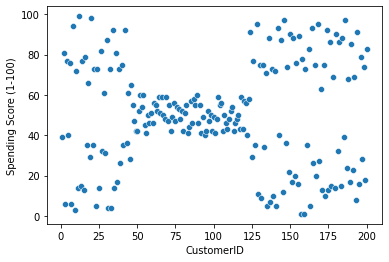

In [61]:
sns.scatterplot(x="CustomerID",y="Spending Score (1-100)",data=customer_spending)

In [62]:
from sklearn.cluster import KMeans

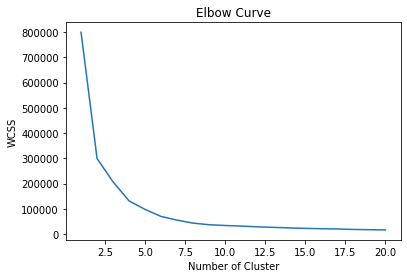

In [65]:
wcss=[]

for i in range(1,21):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=1000,random_state=42)
    kmeans.fit(customer_spending)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,21),wcss)
plt.title("Elbow Curve")
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.show()

In [77]:
kmeans_new=KMeans(n_clusters=6,init="k-means++",random_state=42)

In [78]:
pred=kmeans_new.fit(customer_spending)

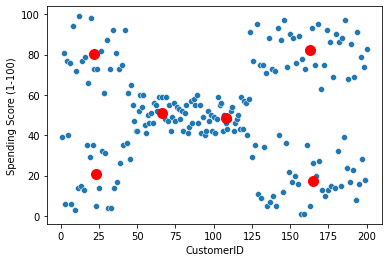

In [81]:
sns.scatterplot(x="CustomerID",y="Spending Score (1-100)",data=customer_spending)
plt.scatter(kmeans_new.cluster_centers_[:,0],kmeans_new.cluster_centers_[:,1],s=100,c="red")
plt.show()